In [2]:
!git clone 'https://github.com/sania8/IntrotoAI.git'

fatal: destination path 'IntrotoAI' already exists and is not an empty directory.


Loading the dataset **"full_df.csv"** and storing the dataframe inside the vairable called **df**

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/working/IntrotoAI/full_df.csv')

Printing the dataframe

In [4]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [5]:
df['target'] = df['target'].astype(str)


Selecting 1000 samples for each class. For the classes where number of samples are less than that of 1000 the data is upsampled and for classes where data has samples more than 1000 are downsampled.
\
The total number of samples selected are 8000 (1000 samples per class, total 8 classes) 

In [6]:
import pandas as pd

TARGET_SAMPLES = 1000
RANDOM_STATE = 42

balanced_dfs = []

for cls in df['target'].unique():
    class_df = df[df['target'] == cls]

    if len(class_df) > TARGET_SAMPLES:
        class_df = class_df.sample(
            n=TARGET_SAMPLES,
            random_state=RANDOM_STATE
        )
    else:
        class_df = class_df.sample(
            n=TARGET_SAMPLES,
            replace=True,
            random_state=RANDOM_STATE
        )

    balanced_dfs.append(class_df)
df_balanced = pd.concat(balanced_dfs).reset_index(drop=True)


In [7]:
print(df_balanced['target'].value_counts())


target
[1, 0, 0, 0, 0, 0, 0, 0]    1000
[0, 1, 0, 0, 0, 0, 0, 0]    1000
[0, 0, 0, 0, 0, 0, 0, 1]    1000
[0, 0, 0, 0, 0, 0, 1, 0]    1000
[0, 0, 0, 0, 0, 1, 0, 0]    1000
[0, 0, 0, 1, 0, 0, 0, 0]    1000
[0, 0, 0, 0, 1, 0, 0, 0]    1000
[0, 0, 1, 0, 0, 0, 0, 0]    1000
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# 70% train, 30% temp
df_train, df_temp = train_test_split(
    df_balanced,
    test_size=0.20,
    random_state=42,
    stratify=df_balanced['target']
)
# Split 30% → 15% val + 15% test
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.50,
    random_state=42,
    stratify=df_temp['target']
)



**The dataset is split to train, test and validation dataset with the following distribution:**
1. Train dataset size : 64002
2. Test Dataset size  : 8003
3. Validation Dataset Size : 800


In [9]:
print("Train size:", len(df_train))
print("Validation size:", len(df_val))
print("Test size:", len(df_test))

print("\nClass distribution (Train):")
print(df_train['target'].value_counts())

print("\nClass distribution (Validation):")
print(df_val['target'].value_counts())

print("\nClass distribution (Test):")
print(df_test['target'].value_counts())


Train size: 6400
Validation size: 800
Test size: 800

Class distribution (Train):
target
[0, 0, 1, 0, 0, 0, 0, 0]    800
[0, 0, 0, 0, 0, 0, 1, 0]    800
[0, 0, 0, 0, 0, 0, 0, 1]    800
[1, 0, 0, 0, 0, 0, 0, 0]    800
[0, 1, 0, 0, 0, 0, 0, 0]    800
[0, 0, 0, 0, 1, 0, 0, 0]    800
[0, 0, 0, 0, 0, 1, 0, 0]    800
[0, 0, 0, 1, 0, 0, 0, 0]    800
Name: count, dtype: int64

Class distribution (Validation):
target
[0, 0, 0, 0, 0, 0, 1, 0]    100
[0, 0, 0, 1, 0, 0, 0, 0]    100
[0, 0, 1, 0, 0, 0, 0, 0]    100
[0, 0, 0, 0, 0, 1, 0, 0]    100
[0, 0, 0, 0, 0, 0, 0, 1]    100
[0, 1, 0, 0, 0, 0, 0, 0]    100
[1, 0, 0, 0, 0, 0, 0, 0]    100
[0, 0, 0, 0, 1, 0, 0, 0]    100
Name: count, dtype: int64

Class distribution (Test):
target
[1, 0, 0, 0, 0, 0, 0, 0]    100
[0, 0, 0, 0, 0, 0, 0, 1]    100
[0, 0, 0, 0, 0, 1, 0, 0]    100
[0, 1, 0, 0, 0, 0, 0, 0]    100
[0, 0, 0, 0, 1, 0, 0, 0]    100
[0, 0, 0, 0, 0, 0, 1, 0]    100
[0, 0, 0, 1, 0, 0, 0, 0]    100
[0, 0, 1, 0, 0, 0, 0, 0]    100
Name: count, dt

In [10]:
df_train['target'] = df_train['target'].astype(str)
df_val['target']   = df_val['target'].astype(str)
df_test['target']  = df_test['target'].astype(str)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (100, 100)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

2025-12-20 12:17:41.475312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766233061.496751     123 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766233061.503211     123 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766233061.520387     123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766233061.520408     123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766233061.520410     123 computation_placer.cc:177] computation placer alr

In [12]:
# Define image folder path
image_folder = '/kaggle/working/IntrotoAI/preprocessed_images'

# Image size and batch size
IMG_SIZE = (100, 100)
BATCH_SIZE = 16


In [13]:
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    df_val,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    df_test,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6400 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.


In [14]:
print("Classes:", train_generator.class_indices)
print("Train samples:", train_generator.samples)
print("Val samples:", val_generator.samples)
print("Test samples:", test_generator.samples)


Classes: {'[0, 0, 0, 0, 0, 0, 0, 1]': 0, '[0, 0, 0, 0, 0, 0, 1, 0]': 1, '[0, 0, 0, 0, 0, 1, 0, 0]': 2, '[0, 0, 0, 0, 1, 0, 0, 0]': 3, '[0, 0, 0, 1, 0, 0, 0, 0]': 4, '[0, 0, 1, 0, 0, 0, 0, 0]': 5, '[0, 1, 0, 0, 0, 0, 0, 0]': 6, '[1, 0, 0, 0, 0, 0, 0, 0]': 7}
Train samples: 6400
Val samples: 800
Test samples: 800


**Fine-tuning VGG-16 for colored images with 4 different combinations of hyperparameters**
\
Experiments
1.    (4, "adam", 1e-4),
2.    (6, "adam", 5e-4),
3.    (4, "rmsprop", 1e-4),
4.    (6, "rmsprop",  5e-4)


Experiment 1
Frozen layers: last 4
Optimizer: adam, LR: 0.0001


I0000 00:00:1766233099.847871     123 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/22


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1766233108.378334     164 service.cc:152] XLA service 0x7e5bb8002610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766233108.378370     164 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1766233108.909721     164 cuda_dnn.cc:529] Loaded cuDNN version 91002


  4/400 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.1224 - loss: 2.7309

I0000 00:00:1766233112.350836     164 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.2768 - loss: 1.8864 - val_accuracy: 0.4000 - val_loss: 1.4609
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4287 - loss: 1.4748 - val_accuracy: 0.4462 - val_loss: 1.3863
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.4529 - loss: 1.3991 - val_accuracy: 0.4038 - val_loss: 1.5222
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.4805 - loss: 1.3466 - val_accuracy: 0.4900 - val_loss: 1.2808
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4926 - loss: 1.3017 - val_accuracy: 0.5200 - val_loss: 1.1939
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.5286 - loss: 1.2098 - val_accuracy: 0.5387 - val_loss: 1.1857
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.5487 - loss: 1.1986 - val_accuracy: 0.5525 - val_loss: 1.1398
Epoch 8/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5550 - loss: 1.1645 - val_accurac

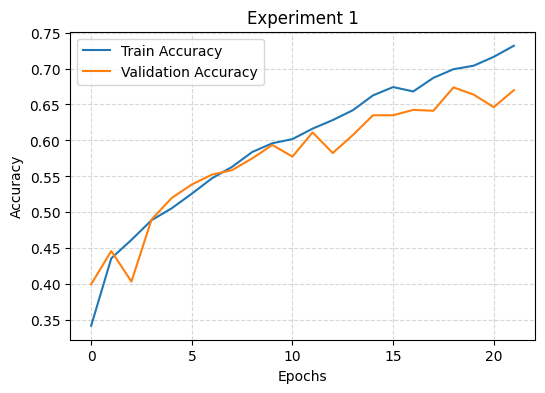


Experiment 2
Frozen layers: last 6
Optimizer: adam, LR: 0.0005
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.1508 - loss: 2.0907 - val_accuracy: 0.3113 - val_loss: 1.6798
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.3807 - loss: 1.6046 - val_accuracy: 0.3350 - val_loss: 1.6416
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.3855 - loss: 1.5510 - val_accuracy: 0.4238 - val_loss: 1.4378
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.4392 - loss: 1.4209 - val_accuracy: 0.4050 - val_loss: 1.6032
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.4747 - loss: 1.3429 - val_accuracy: 0.4563 - val_loss: 1.3435
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.4894 - loss: 1.2926 - val_accuracy: 0.4650 - val_loss: 1.3312
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4979 - loss: 1.2831 - val_accuracy: 0.5150 - val_loss: 1.3584
Epoch 8/22
400/400 ━━━━━━━

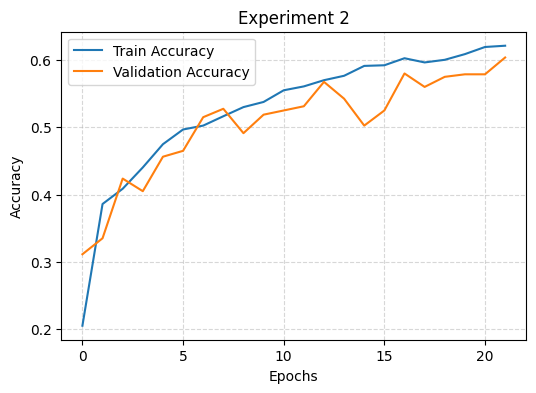


Experiment 3
Frozen layers: last 4
Optimizer: rmsprop, LR: 0.0001
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.2961 - loss: 1.8577 - val_accuracy: 0.4350 - val_loss: 1.4706
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4044 - loss: 1.5307 - val_accuracy: 0.4550 - val_loss: 1.3709
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4358 - loss: 1.4452 - val_accuracy: 0.4825 - val_loss: 1.3576
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4603 - loss: 1.3931 - val_accuracy: 0.5088 - val_loss: 1.2754
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4989 - loss: 1.3074 - val_accuracy: 0.4175 - val_loss: 1.5148
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5052 - loss: 1.2914 - val_accuracy: 0.5238 - val_loss: 1.1974
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5328 - loss: 1.2237 - val_accuracy: 0.5250 - val_loss: 1.2562
Epoch 8/22
400/400 ━━━━

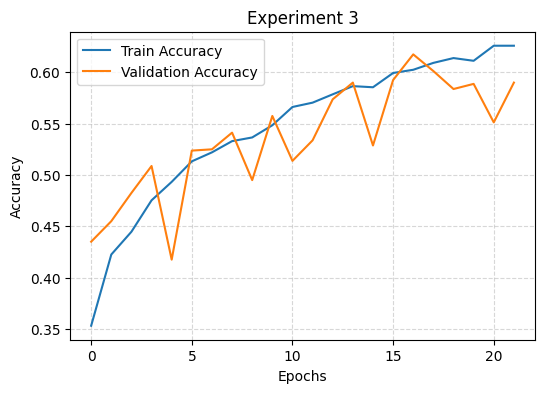


Experiment 4
Frozen layers: last 6
Optimizer: rmsprop, LR: 0.0005
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.1247 - loss: 2.1801 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.1251 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.1317 - loss: 2.0795 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.1250 - loss: 2.0795 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.1145 - loss: 2.0797 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.1231 - loss: 2.0794 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.1283 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 8/22
400/400 ━━━━

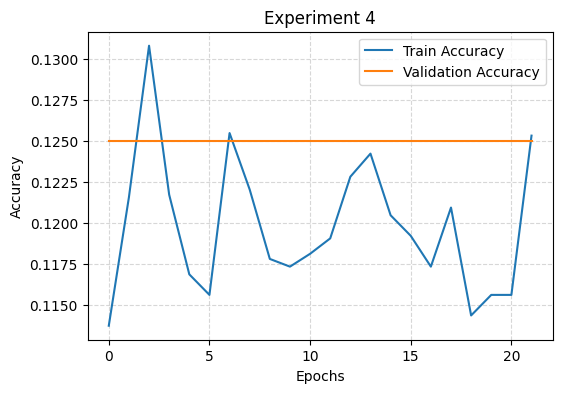

   Experiment  Frozen_Layers Optimizer  Learning_Rate  Train_Accuracy  \
0           1              4      adam         0.0001        0.731719   
2           3              4   rmsprop         0.0001        0.625938   
1           2              6      adam         0.0005        0.621250   
3           4              6   rmsprop         0.0005        0.130781   

   Val_Accuracy  
0       0.67375  
2       0.61750  
1       0.60375  
3       0.12500  

 BEST MODEL
Frozen Layers : last 4
Optimizer     : adam
Learning Rate : 0.0001
Train Accuracy: 0.7317
Val Accuracy  : 0.6737


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

experiments = [
    (4, "adam", 1e-4),
    (6, "adam", 5e-4),
    (4, "rmsprop", 1e-4),
    (6, "rmsprop",  5e-4)
]

EPOCHS = 22
NUM_CLASSES = 8

steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

results = []

for i, (freeze_layers, optimizer_name, lr) in enumerate(experiments, 1):

    print(f"\nExperiment {i}")
    print(f"Frozen layers: last {freeze_layers}")
    print(f"Optimizer: {optimizer_name}, LR: {lr}")

    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    for layer in base_model.layers[:-freeze_layers]:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    optimizer = Adam(lr) if optimizer_name == "adam" else RMSprop(lr)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=steps_per_epoch,
        validation_steps=val_steps,
        epochs=EPOCHS,
        verbose=1
    )
    results.append({
        "Experiment": i,
        "Frozen_Layers": freeze_layers,
        "Optimizer": optimizer_name,
        "Learning_Rate": lr,
        "Train_Accuracy": max(history.history['accuracy']),
        "Val_Accuracy": max(history.history['val_accuracy'])
    })
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Experiment {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

results_df = pd.DataFrame(results).sort_values("Val_Accuracy", ascending=False)

print(results_df)

best = results_df.iloc[0]

print("\n BEST MODEL")
print(f"Frozen Layers : last {best['Frozen_Layers']}")
print(f"Optimizer     : {best['Optimizer']}")
print(f"Learning Rate : {best['Learning_Rate']}")
print(f"Train Accuracy: {best['Train_Accuracy']:.4f}")
print(f"Val Accuracy  : {best['Val_Accuracy']:.4f}")


Training the model with best parameters for coloured images which are as follows: 
1. frozen layers : last 4
2. Optmizer: Adam Optmizer
3. Learnign rate : 0.0001
4. Epochs : 40

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 7,146,120 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.2866 - loss: 1.8497 - val_accuracy: 0.4538 - val_loss: 1.3915
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.4366 - loss: 1.4657 - val_accuracy: 0.4775 - val_loss: 1.3367
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.4595 - loss: 1.3912 - val_accuracy: 0.4863 - val_loss: 1.2959
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.4684 - loss: 1.3442 - val_accuracy: 0.5100 - val_loss: 1.2732
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5063 - loss: 1.2758 - val_accuracy: 0.5362 - val_loss: 1.2052
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5384 - loss: 1.1950 - val_accuracy: 0.5425 - val_loss: 1.2145
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5629 - loss: 1.1626 - val_accuracy: 0.5238 - val_loss: 1.2039
Epoch 8/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5802 - loss: 1.1140 - 

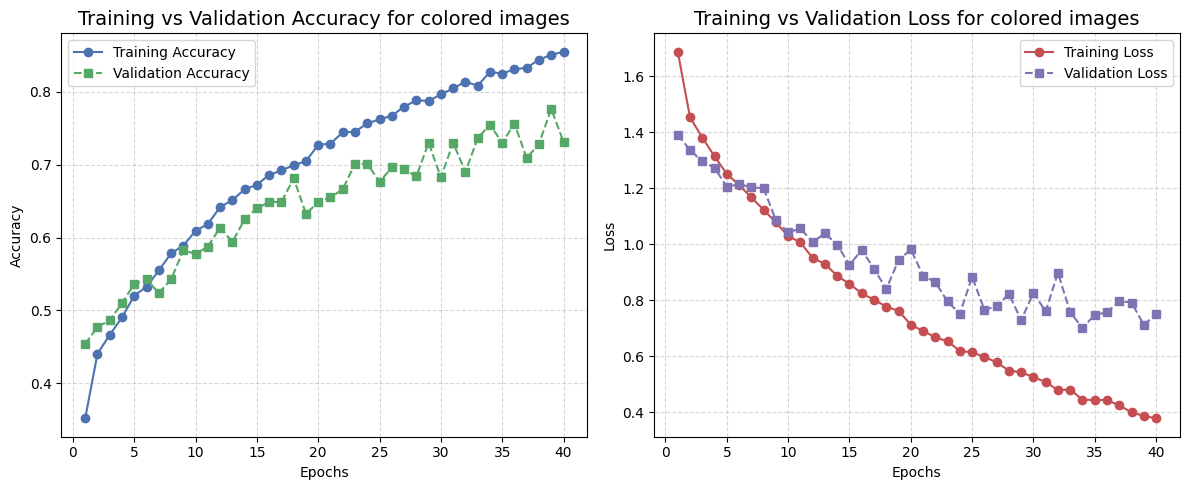

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import GlobalAveragePooling2D
NUM_CLASSES = 8

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

for layer in base_model.layers[:-4]:  
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),   
    Dropout(0.4),   
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),   
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
from tensorflow.keras.callbacks import EarlyStopping


steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

history_best_colored = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    epochs=40,
    verbose=1
)
# plotting the results to showcase training accuracy and validation accuracy over epochs , training loss and validation loss over epochs
import matplotlib.pyplot as plt
acc = history_best_colored.history['accuracy']
val_acc = history_best_colored.history['val_accuracy']
loss = history_best_colored.history['loss']
val_loss = history_best_colored.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'o-', label='Training Accuracy', color='#4C72B0')
plt.plot(epochs, val_acc, 's--', label='Validation Accuracy', color='#55A868')
plt.title('Training vs Validation Accuracy for colored images', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'o-', label='Training Loss', color='#C44E52')
plt.plot(epochs, val_loss, 's--', label='Validation Loss', color='#8172B3')
plt.title('Training vs Validation Loss for colored images', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Multi-class Classification for Grayscale images 

In [17]:
color_mode='grayscale'


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (100, 100)
BATCH_SIZE = 16

train_datagen_gray = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen_gray = ImageDataGenerator(rescale=1./255)

train_generator_gray = train_datagen_gray.flow_from_dataframe(
    df_train,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator_gray = val_test_datagen_gray.flow_from_dataframe(
    df_val,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_generator_gray = val_test_datagen_gray.flow_from_dataframe(
    df_test,
    directory=image_folder,
    x_col='filename',
    y_col='target',
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 6400 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.
Found 800 validated image filenames belonging to 8 classes.


In [19]:
print("Train samples:", train_generator_gray.samples)
print("Validation samples:", val_generator_gray.samples)
print("Test samples:", test_generator_gray.samples)

print("Batch size:", train_generator_gray.batch_size)
print("Number of classes:", len(train_generator_gray.class_indices))
print("Class indices:", train_generator_gray.class_indices)

x_batch, y_batch = next(train_generator_gray)
print("Input batch shape:", x_batch.shape)
print("Label batch shape:", y_batch.shape)


Train samples: 6400
Validation samples: 800
Test samples: 800
Batch size: 16
Number of classes: 8
Class indices: {'[0, 0, 0, 0, 0, 0, 0, 1]': 0, '[0, 0, 0, 0, 0, 0, 1, 0]': 1, '[0, 0, 0, 0, 0, 1, 0, 0]': 2, '[0, 0, 0, 0, 1, 0, 0, 0]': 3, '[0, 0, 0, 1, 0, 0, 0, 0]': 4, '[0, 0, 1, 0, 0, 0, 0, 0]': 5, '[0, 1, 0, 0, 0, 0, 0, 0]': 6, '[1, 0, 0, 0, 0, 0, 0, 0]': 7}
Input batch shape: (16, 100, 100, 1)
Label batch shape: (16, 8)


Since the input shape accepted by VGG16 is with channels = 3 hence it cannot accpet input shape as (Batch_size,Height,Width,1). Hence stacked grayscale data on top of one another in order maintain the shape as (Batch_size, Height,Widht,3)

In [20]:
import numpy as np

def gray_to_rgb_generator(generator):
    while True:
        x, y = next(generator)
        x_rgb = np.repeat(x, 3, axis=-1)  # (B,224,224,1) → (B,224,224,3)
        yield x_rgb, y


**Fine-tuning VGG-16 for grayscale images with 4 different combinations of hyperparameters**
\
Experiments
1.    (4, "adam", 1e-4),
2.    (6, "adam", 5e-4),
3.    (4, "rmsprop", 1e-4),
4.    (6, "rmsprop",  5e-4)

========fine tuning VGG16 for Grayscale images using 4 different combinations to find the best set of parameters=======

Experiment 1
Frozen layers: last 4
Optimizer: adam, LR: 0.0001
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.2889 - loss: 1.8600 - val_accuracy: 0.4275 - val_loss: 1.4261
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4161 - loss: 1.4894 - val_accuracy: 0.4787 - val_loss: 1.3454
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.4596 - loss: 1.3891 - val_accuracy: 0.4837 - val_loss: 1.3301
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4722 - loss: 1.3651 - val_accuracy: 0.5188 - val_loss: 1.2420
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4925 - loss: 1.3088 - val_accuracy: 0.5250 - val_loss: 1.2069
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.5083 - loss: 1.2742 - val_accuracy: 0.5288 - val_loss: 1.2586
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━

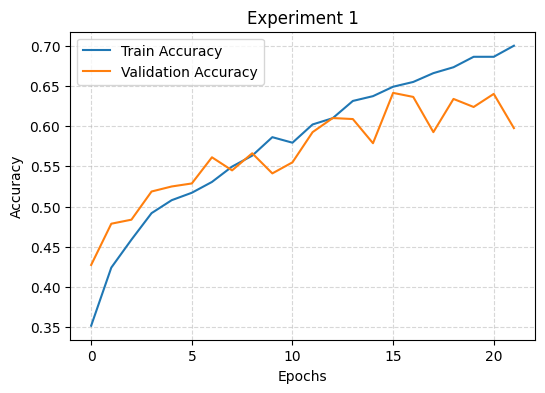


Experiment 2
Frozen layers: last 6
Optimizer: adam, LR: 0.0005
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.1259 - loss: 2.1251 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.1223 - loss: 2.0798 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.1135 - loss: 2.0799 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.1184 - loss: 2.0798 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1217 - loss: 2.0795 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.1260 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.1110 - loss: 2.0798 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 8/22
400/400 ━━━━━━━

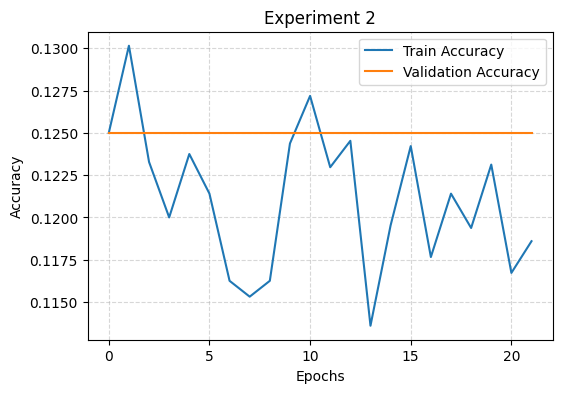


Experiment 3
Frozen layers: last 4
Optimizer: rmsprop, LR: 0.0001
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.3150 - loss: 1.8059 - val_accuracy: 0.4638 - val_loss: 1.3683
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4208 - loss: 1.5169 - val_accuracy: 0.4275 - val_loss: 1.5203
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.4481 - loss: 1.4490 - val_accuracy: 0.4963 - val_loss: 1.2978
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4792 - loss: 1.3790 - val_accuracy: 0.5025 - val_loss: 1.3281
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.4795 - loss: 1.3687 - val_accuracy: 0.5150 - val_loss: 1.2330
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.5026 - loss: 1.2885 - val_accuracy: 0.5213 - val_loss: 1.2459
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5106 - loss: 1.3014 - val_accuracy: 0.5350 - val_loss: 1.2183
Epoch 8/22
400/400 ━━━━

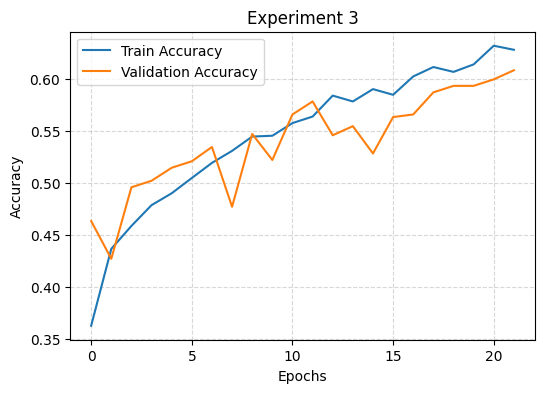


Experiment 4
Frozen layers: last 6
Optimizer: rmsprop, LR: 0.0005
Epoch 1/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.1347 - loss: 2.4815 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 2/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1272 - loss: 2.0795 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 3/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.1261 - loss: 2.0798 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 4/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1182 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 5/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1253 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 6/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.1250 - loss: 2.0795 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 7/22
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.1246 - loss: 2.0796 - val_accuracy: 0.1250 - val_loss: 2.0794
Epoch 8/22
400/400 ━━━━

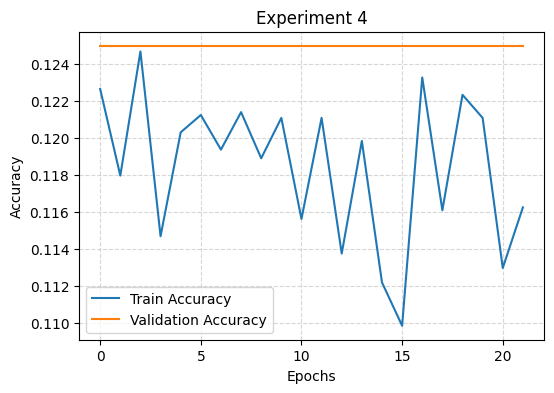

   Experiment  Frozen_Layers Optimizer  Learning_Rate  Train_Accuracy  \
0           1              4      adam         0.0001        0.699844   
2           3              4   rmsprop         0.0001        0.632344   
1           2              6      adam         0.0005        0.130156   
3           4              6   rmsprop         0.0005        0.124688   

   Val_Accuracy  
0       0.64125  
2       0.60875  
1       0.12500  
3       0.12500  

 BEST MODEL
Frozen Layers : last 4
Optimizer     : adam
Learning Rate : 0.0001
Train Accuracy: 0.6998
Val Accuracy  : 0.6413


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
print("========fine tuning VGG16 for Grayscale images using 4 different combinations to find the best set of parameters=======")
experiments = [
    (4, "adam", 1e-4),
    (6, "adam", 5e-4),
    (4, "rmsprop", 1e-4),
    (6, "rmsprop",  5e-4)
]

EPOCHS = 22
NUM_CLASSES = 8

steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

results = []

for i, (freeze_layers, optimizer_name, lr) in enumerate(experiments, 1):

    print(f"\nExperiment {i}")
    print(f"Frozen layers: last {freeze_layers}")
    print(f"Optimizer: {optimizer_name}, LR: {lr}")

    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )

    for layer in base_model.layers[:-freeze_layers]:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    optimizer = Adam(lr) if optimizer_name == "adam" else RMSprop(lr)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        gray_to_rgb_generator(train_generator_gray),
        validation_data=gray_to_rgb_generator(val_generator_gray),
        steps_per_epoch=train_generator_gray.samples // BATCH_SIZE,
        validation_steps=val_generator_gray.samples // BATCH_SIZE,
        epochs=EPOCHS,
        verbose=1
    )
    results.append({
        "Experiment": i,
        "Frozen_Layers": freeze_layers,
        "Optimizer": optimizer_name,
        "Learning_Rate": lr,
        "Train_Accuracy": max(history.history['accuracy']),
        "Val_Accuracy": max(history.history['val_accuracy'])
    })
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Experiment {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

results_df = pd.DataFrame(results).sort_values("Val_Accuracy", ascending=False)

print(results_df)

best = results_df.iloc[0]

print("\n BEST MODEL")
print(f"Frozen Layers : last {best['Frozen_Layers']}")
print(f"Optimizer     : {best['Optimizer']}")
print(f"Learning Rate : {best['Learning_Rate']}")
print(f"Train Accuracy: {best['Train_Accuracy']:.4f}")
print(f"Val Accuracy  : {best['Val_Accuracy']:.4f}")


Training the model with the best parameters for the grayscale images which are as follows:
1. Learning rate : 0.0001
2. Optimizer :Adam
3. Number of frozen layers : last 4
4. Epochs : 40

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 7,146,120 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.3242 - loss: 1.7746 - val_accuracy: 0.4313 - val_loss: 1.4113
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4373 - loss: 1.4792 - val_accuracy: 0.4775 - val_loss: 1.3356
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.4750 - loss: 1.3825 - val_accuracy: 0.4600 - val_loss: 1.3643
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4881 - loss: 1.3318 - val_accuracy: 0.4688 - val_loss: 1.3238
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.5132 - loss: 1.2812 - val_accuracy: 0.4938 - val_loss: 1.2182
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5285 - loss: 1.2256 - val_accuracy: 0.5462 - val_loss: 1.1792
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5322 - loss: 1.1959 - val_accuracy: 0.5587 - val_loss: 1.1280
Epoch 8/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5656 - loss: 1.1393 - 

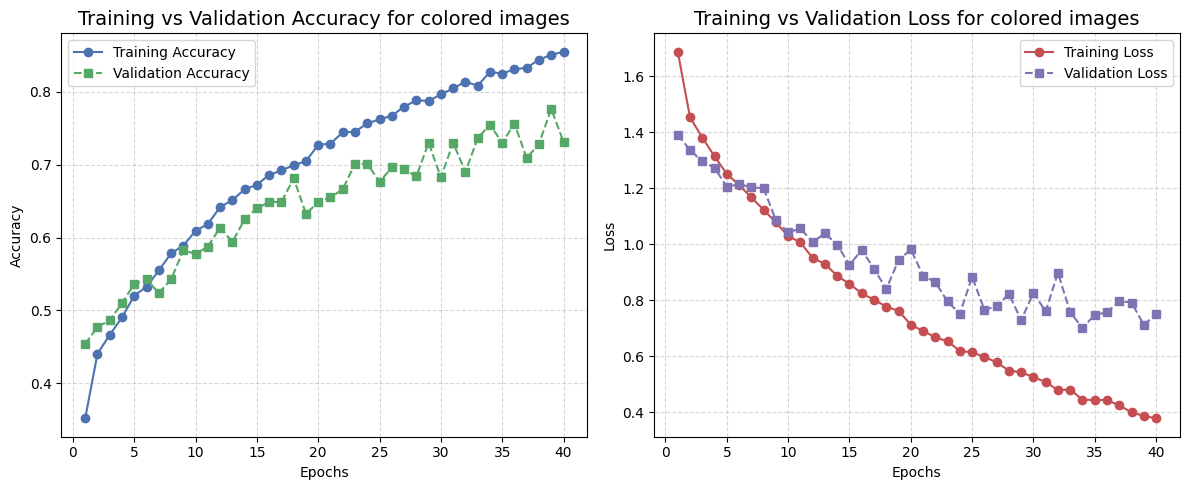

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import GlobalAveragePooling2D
NUM_CLASSES = 8
EPOCHS = 40
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

for layer in base_model.layers[:-4]:  
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),   
    Dropout(0.4),   
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),   
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

history_best_gray = model.fit(
    gray_to_rgb_generator(train_generator_gray),
    validation_data=gray_to_rgb_generator(val_generator_gray),
    steps_per_epoch=train_generator_gray.samples // BATCH_SIZE,
    validation_steps=val_generator_gray.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)
# plotting the results to showcase training accuracy and validation accuracy over epochs , training loss and validation loss over epochs
import matplotlib.pyplot as plt
acc = history_best_colored.history['accuracy']
val_acc = history_best_colored.history['val_accuracy']
loss = history_best_colored.history['loss']
val_loss = history_best_colored.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'o-', label='Training Accuracy', color='#4C72B0')
plt.plot(epochs, val_acc, 's--', label='Validation Accuracy', color='#55A868')
plt.title('Training vs Validation Accuracy for colored images', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'o-', label='Training Loss', color='#C44E52')
plt.plot(epochs, val_loss, 's--', label='Validation Loss', color='#8172B3')
plt.title('Training vs Validation Loss for colored images', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

Final Metrics for the results of fine-tuned VGG16 on grayscale images and colored images for best parameters

Results of all the combinations that were used to fine tune the model in order to select the best one

In [31]:
import pandas as pd

df_colored = pd.DataFrame({
    "Experiment": [1, 3, 2, 4],
    "Frozen_Layers": [4, 4, 6, 6],
    "Optimizer": ["adam", "rmsprop", "adam", "rmsprop"],
    "Learning_Rate": [0.0001, 0.0001, 0.0005, 0.0005],
    "Train_Accuracy": [0.731719, 0.625938, 0.621250, 0.130781],
    "Val_Accuracy": [0.67375, 0.61750, 0.60375, 0.12500]
})

df_gray = pd.DataFrame({
    "Experiment": [1, 3, 2, 4],
    "Frozen_Layers": [4, 4, 6, 6],
    "Optimizer": ["adam", "rmsprop", "adam", "rmsprop"],
    "Learning_Rate": [0.0001, 0.0001, 0.0005, 0.0005],
    "Train_Accuracy": [0.699844, 0.632344, 0.130156, 0.124688],
    "Val_Accuracy": [0.64125, 0.60875, 0.12500, 0.12500]
})


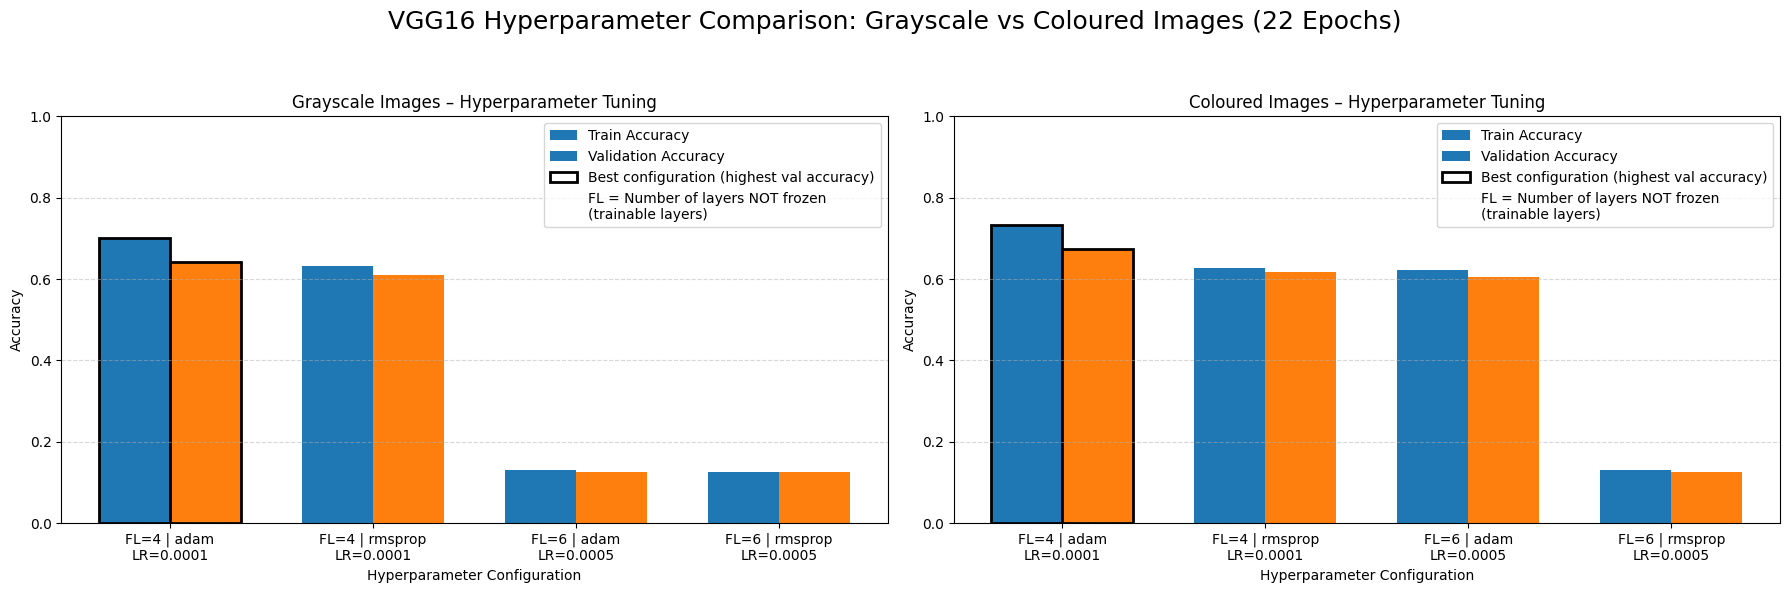

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

df_gray["Label"] = df_gray.apply(
    lambda x: f"FL={x.Frozen_Layers} | {x.Optimizer}\nLR={x.Learning_Rate}",
    axis=1
)

df_colored["Label"] = df_colored.apply(
    lambda x: f"FL={x.Frozen_Layers} | {x.Optimizer}\nLR={x.Learning_Rate}",
    axis=1
)

plt.figure(figsize=(18, 6))
width = 0.35

x_gray = np.arange(len(df_gray))
ax1 = plt.subplot(1, 2, 1)

bars_g_train = ax1.bar(
    x_gray - width/2, df_gray["Train_Accuracy"],
    width, label="Train Accuracy"
)
bars_g_val = ax1.bar(
    x_gray + width/2, df_gray["Val_Accuracy"],
    width, label="Validation Accuracy"
)

ax1.set_xticks(x_gray)
ax1.set_xticklabels(df_gray["Label"])
ax1.set_xlabel("Hyperparameter Configuration")
ax1.set_ylabel("Accuracy")
ax1.set_title("Grayscale Images – Hyperparameter Tuning")
ax1.set_ylim(0, 1)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Highlight best (border only)
best_gray = df_gray["Val_Accuracy"].idxmax()
bars_g_train[best_gray].set_edgecolor("black")
bars_g_train[best_gray].set_linewidth(2)

bars_g_val[best_gray].set_edgecolor("black")
bars_g_val[best_gray].set_linewidth(2)

x_col = np.arange(len(df_colored))
ax2 = plt.subplot(1, 2, 2)

bars_c_train = ax2.bar(
    x_col - width/2, df_colored["Train_Accuracy"],
    width, label="Train Accuracy"
)
bars_c_val = ax2.bar(
    x_col + width/2, df_colored["Val_Accuracy"],
    width, label="Validation Accuracy"
)

ax2.set_xticks(x_col)
ax2.set_xticklabels(df_colored["Label"])
ax2.set_xlabel("Hyperparameter Configuration")
ax2.set_ylabel("Accuracy")
ax2.set_title("Coloured Images – Hyperparameter Tuning")
ax2.set_ylim(0, 1)
ax2.grid(axis="y", linestyle="--", alpha=0.5)

# Highlight best (border only)
best_col = df_colored["Val_Accuracy"].idxmax()
bars_c_train[best_col].set_edgecolor("black")
bars_c_train[best_col].set_linewidth(2)

bars_c_val[best_col].set_edgecolor("black")
bars_c_val[best_col].set_linewidth(2)

accuracy_legend = [
    Patch(label="Train Accuracy"),
    Patch(label="Validation Accuracy"),
    Patch(edgecolor="black", facecolor="none", linewidth=2,
          label="Best configuration (highest val accuracy)")
]

fl_legend = [
    Patch(facecolor="none", edgecolor="none",
          label="FL = Number of layers NOT frozen\n(trainable layers)")
]

ax1.legend(handles=accuracy_legend + fl_legend, fontsize=10)
ax2.legend(handles=accuracy_legend + fl_legend, fontsize=10)

plt.suptitle(
    "VGG16 Hyperparameter Comparison: Grayscale vs Coloured Images (22 Epochs)",
    fontsize=18
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("hyperparameter_comparision.png", dpi=300)
plt.show()


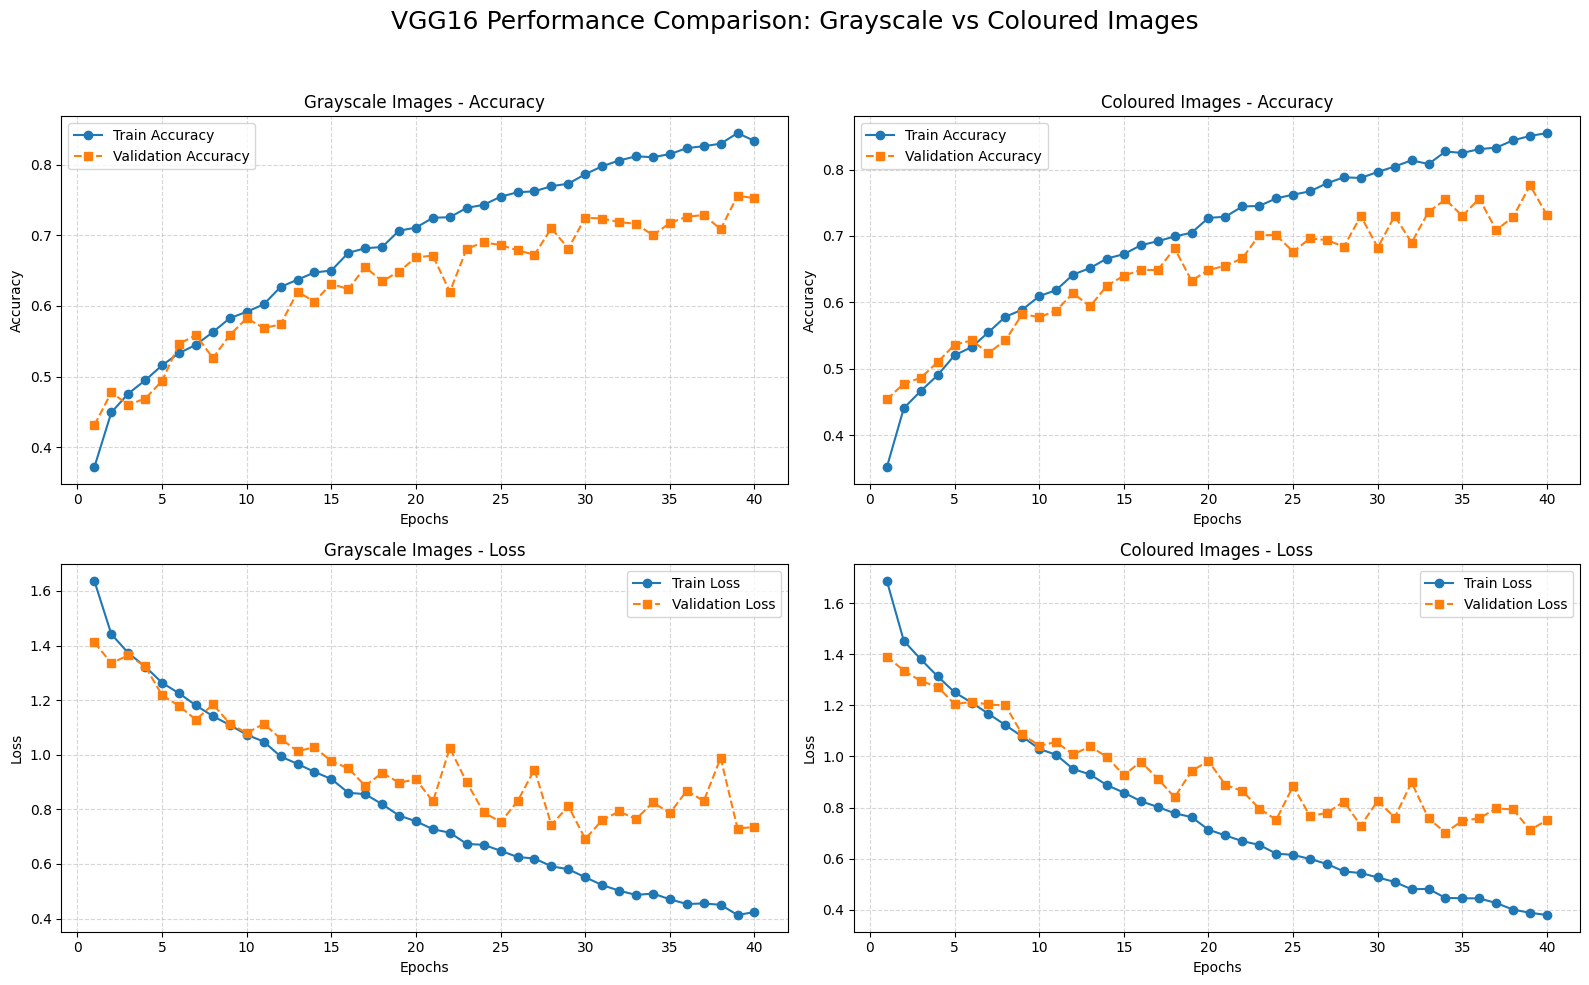

In [57]:
import matplotlib.pyplot as plt
acc_g = history_best_gray.history['accuracy']
val_acc_g = history_best_gray.history['val_accuracy']
loss_g = history_best_gray.history['loss']
val_loss_g = history_best_gray.history['val_loss']
epochs_g = range(1, len(acc_g) + 1)

acc_c = history_best_colored.history['accuracy']
val_acc_c = history_best_colored.history['val_accuracy']
loss_c = history_best_colored.history['loss']
val_loss_c = history_best_colored.history['val_loss']
epochs_c = range(1, len(acc_c) + 1)

plt.figure(figsize=(16, 10))

# Grayscale Accuracy 
plt.subplot(2, 2, 1)
plt.plot(epochs_g, acc_g, 'o-', label='Train Accuracy')
plt.plot(epochs_g, val_acc_g, 's--', label='Validation Accuracy')
plt.title('Grayscale Images - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Grayscale Loss
plt.subplot(2, 2, 3)
plt.plot(epochs_g, loss_g, 'o-', label='Train Loss')
plt.plot(epochs_g, val_loss_g, 's--', label='Validation Loss')
plt.title('Grayscale Images - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Colored Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs_c, acc_c, 'o-', label='Train Accuracy')
plt.plot(epochs_c, val_acc_c, 's--', label='Validation Accuracy')
plt.title('Coloured Images - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Colored Loss
plt.subplot(2, 2, 4)
plt.plot(epochs_c, loss_c, 'o-', label='Train Loss')
plt.plot(epochs_c, val_loss_c, 's--', label='Validation Loss')
plt.title('Coloured Images - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.suptitle('VGG16 Performance Comparison: Grayscale vs Coloured Images', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('final_results.png')
plt.show()


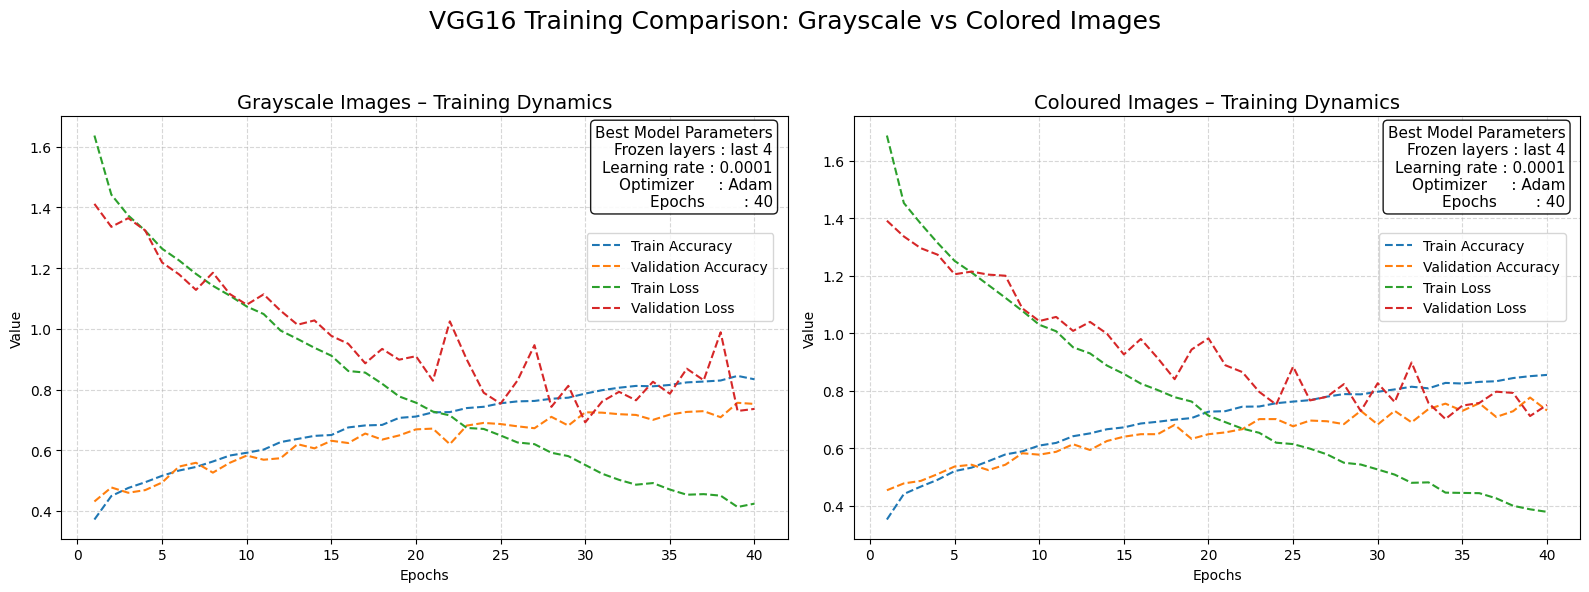

In [61]:
import matplotlib.pyplot as plt
acc_g = history_best_gray.history['accuracy']
val_acc_g = history_best_gray.history['val_accuracy']
loss_g = history_best_gray.history['loss']
val_loss_g = history_best_gray.history['val_loss']
epochs_g = range(1, len(acc_g) + 1)

acc_c = history_best_colored.history['accuracy']
val_acc_c = history_best_colored.history['val_accuracy']
loss_c = history_best_colored.history['loss']
val_loss_c = history_best_colored.history['val_loss']
epochs_c = range(1, len(acc_c) + 1)

best_params_text = (
    "Best Model Parameters\n"
    "Frozen layers : last 4\n"
    "Learning rate : 0.0001\n"
    "Optimizer     : Adam\n"
    "Epochs        : 40"
)

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)

l1, = ax1.plot(epochs_g, acc_g, '--', label='Train Accuracy')
l2, = ax1.plot(epochs_g, val_acc_g, '--', label='Validation Accuracy')
l3, = ax1.plot(epochs_g, loss_g, '--', label='Train Loss')
l4, = ax1.plot(epochs_g, val_loss_g, '--', label='Validation Loss')

ax1.set_title('Grayscale Images – Training Dynamics', fontsize=14)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Value')
ax1.grid(True, linestyle='--', alpha=0.5)

ax1.text(
    0.98, 0.98, best_params_text,
    transform=ax1.transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9)
)

ax1.legend(
    handles=[l1, l2, l3, l4],
    loc='upper right',
    bbox_to_anchor=(0.99, 0.74),
    fontsize=10,
    frameon=True
)

ax2 = plt.subplot(1, 2, 2)

l1, = ax2.plot(epochs_c, acc_c, '--', label='Train Accuracy')
l2, = ax2.plot(epochs_c, val_acc_c, '--', label='Validation Accuracy')
l3, = ax2.plot(epochs_c, loss_c, '--', label='Train Loss')
l4, = ax2.plot(epochs_c, val_loss_c, '--', label='Validation Loss')

ax2.set_title('Coloured Images – Training Dynamics', fontsize=14)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Value')
ax2.grid(True, linestyle='--', alpha=0.5)

ax2.text(
    0.98, 0.98, best_params_text,
    transform=ax2.transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9)
)

ax2.legend(
    handles=[l1, l2, l3, l4],
    loc='upper right',
    bbox_to_anchor=(0.99, 0.74),
    fontsize=10,
    frameon=True
)

plt.suptitle(
    'VGG16 Training Comparison: Grayscale vs Colored Images',
    fontsize=18
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("Training_results_consolidated.png")
plt.show()


Plotting the data to show training, testing and validation accuracy for grayscale and colored images 

In [59]:
# -----------------------------
# FINAL TRAIN & VAL ACCURACY
# -----------------------------
final_metrics = {
    "Grayscale": {
        "Train": history_best_gray.history["accuracy"][-1],
        "Validation": history_best_gray.history["val_accuracy"][-1]
    },
    "Coloured": {
        "Train": history_best_colored.history["accuracy"][-1],
        "Validation": history_best_colored.history["val_accuracy"][-1]
    }
}

print("Final Accuracies:")
for k, v in final_metrics.items():
    print(f"{k}: Train={v['Train']:.4f}, Val={v['Validation']:.4f}")


Final Accuracies:
Grayscale: Train=0.8336, Val=0.7525
Coloured: Train=0.8550, Val=0.7312


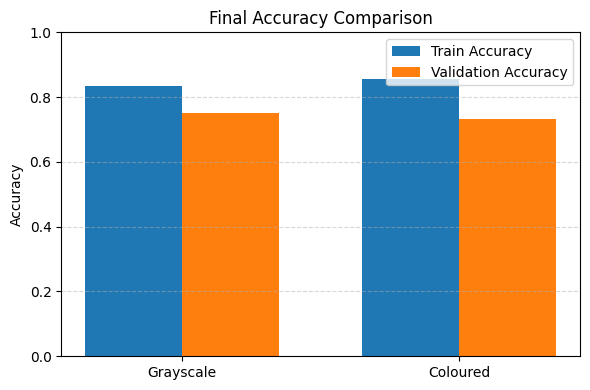

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Grayscale', 'Coloured']
train_acc = [0.8336, 0.8550]
val_acc = [0.7525, 0.7312]

x = np.arange(len(categories))
width = 0.35

# Plot
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy')

plt.xticks(x, categories)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Final Accuracy Comparison')
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('finalaccurcycompariison.png')
plt.show()
